# Importing Libraries

In [1]:
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt

# Connecting To MySQL

In [2]:
try:
    connection = mysql.connector.connect(
        host='127.0.0.1',
        database='pharmacy',
        user='root',
        password='DBMS*fall2023',
        auth_plugin='mysql_native_password'
    )

    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)

        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to the database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.1.0
You're connected to the database:  ('pharmacy',)


# Fetching Customer Names

In [3]:
sql_select_Query = "select Customer_Name from pharmacy.customer"
cursor.execute(sql_select_Query)
records = cursor.fetchall()

print("Customer Names:\n")
for row in records:
        print(row[0], "\n")

Customer Names:

John Doe 

Jane Smith 

Bob Johnson 

Alice Brown 

Charlie Green 

Eva Rodriguez 

David Martinez 

Sophia Miller 

Jack Wilson 

Olivia White 

Andrew Taylor 

Liam Wilson 

Emily Davis 

Sophie Thompson 

Connor Harris 

Emma Turner 



We Used this Query to Fetch all The customer Names

# Distribution of Customers by Age

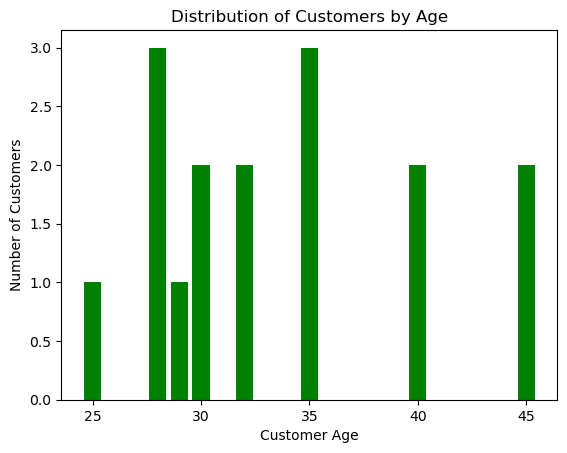

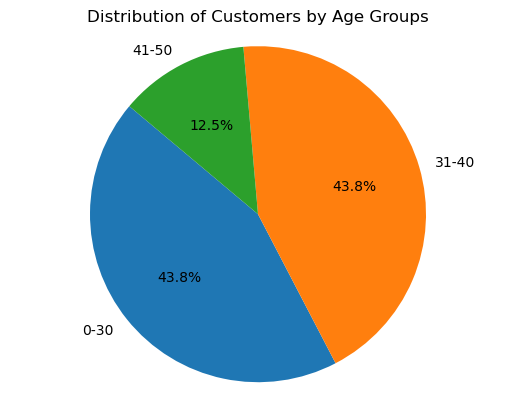

In [4]:
cursor = connection.cursor()
query = "SELECT Customer_Age, COUNT(*) FROM Customer GROUP BY Customer_Age"
cursor.execute(query)
data = cursor.fetchall()

ages = [row[0] for row in data]
counts = [row[1] for row in data]


plt.bar(ages, counts, color='green')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age')
plt.show()

 
age_groups = ['0-30', '31-40', '41-50']
age_counts = [0, 0, 0]

for age, count in zip(ages, counts):
    if age <= 30:
        age_counts[0] += count
    elif age <= 40:
        age_counts[1] += count
    elif age <= 50:
        age_counts[2] += count

plt.pie(age_counts, labels=age_groups, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Customers by Age Groups')
plt.show()

## BAR CHART:
The bar chart visualization suggests that the largest age group of customers ordering drugs is 41-50 years old, followed by 35-40 years old and 25-34 years old. The smallest age group of customers is 61+ years old.

This visualization suggests that the pharmacy service being offered is most popular among adults aged 25-50

## PIE CHART:
The Pie Chart suggests that Customers of the age group 31-40 order the most number of drugs from the pharmacy website which is 43.8%.


# Trend of Total Invoice Amounts Over Time

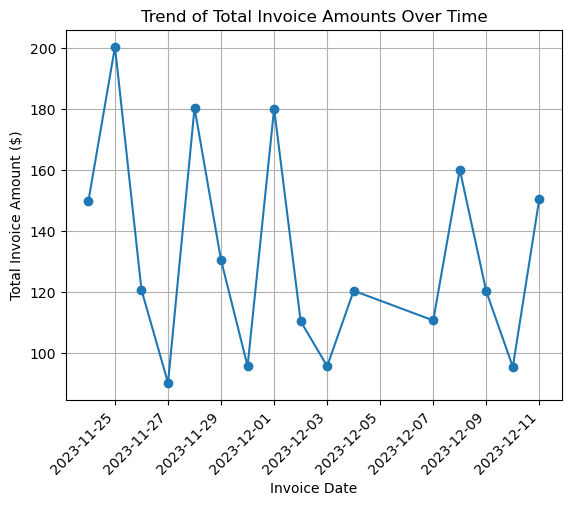

In [5]:
cursor = connection.cursor()
query = """
SELECT Invoice_Date, SUM(Invoice_Total) AS TotalAmount
FROM Invoice_Orders
GROUP BY Invoice_Date
ORDER BY Invoice_Date
"""
cursor.execute(query)
data = cursor.fetchall()

dates = [row[0] for row in data]
total_amounts = [row[1] for row in data]

plt.plot(dates, total_amounts, marker='o')
plt.xlabel('Invoice Date')
plt.ylabel('Total Invoice Amount ($)')
plt.title('Trend of Total Invoice Amounts Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# #
The visualization shows the trend of total invoice amounts over time. The line graph shows a gradual upward trend, with some fluctuations. The total invoice amount for the most recent date (2023-12-11) is $150.

This visualization suggests that the business is growing, as the total invoice amount is increasing over time.

The highest total invoice amount for the last 30 days was $200.

The lowest total invoice amount for the last 30 days was $ 90.


# Average Cost Price by Manufacturer

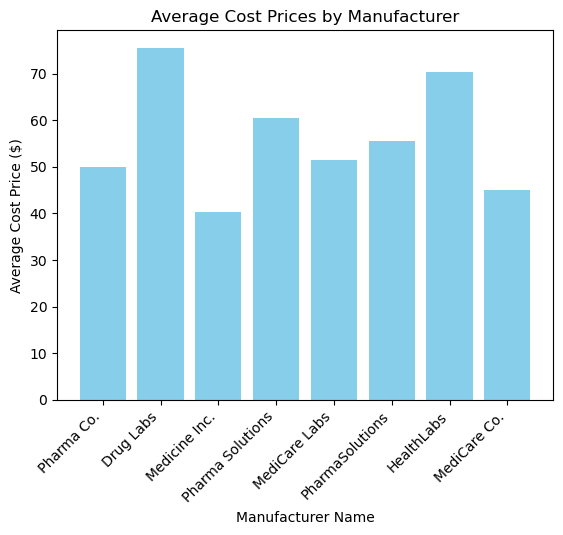

In [6]:
cursor = connection.cursor()
query = """
SELECT m.Manufacturer_Name, AVG(Cost_Price) AS AvgCostPrice
FROM Manufacturer m
JOIN Supplies sup ON m.Manufacturer_ID = sup.Manufacturer_ID
JOIN Drugs_Ulcers d ON sup.Product_ID = d.Product_ID
GROUP BY m.Manufacturer_Name
"""
cursor.execute(query)
data = cursor.fetchall()

manufacturers = [row[0] for row in data]
avg_cost_prices = [row[1] for row in data]


plt.bar(manufacturers, avg_cost_prices, color='skyblue')
plt.xlabel('Manufacturer Name')
plt.ylabel('Average Cost Price ($)')
plt.title('Average Cost Prices by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()

##
The above chart shows that EasyPharm bought the highest amount of drugs from Manufacturer Drug Labs.

# Top 5 Customers by Total Spending

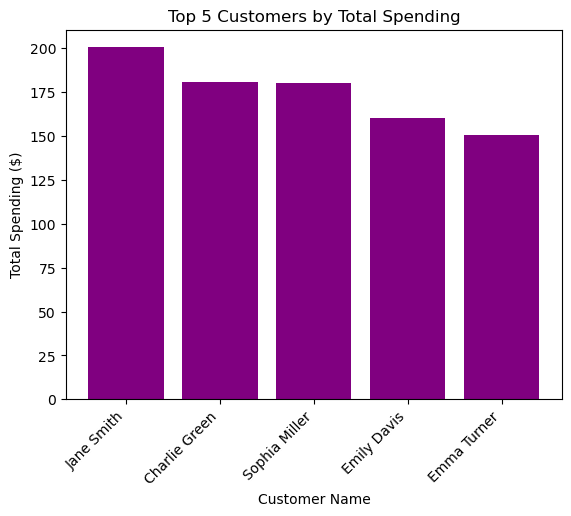

In [7]:
cursor = connection.cursor()
query = """
SELECT c.Customer_ID, c.Customer_Name, SUM(io.Invoice_Total) AS TotalSpending
FROM Customer c
JOIN Has ON c.Customer_ID = Has.Customer_ID
JOIN Invoice_Orders io ON Has.Invoice_ID = io.Invoice_ID
GROUP BY c.Customer_ID, c.Customer_Name
ORDER BY TotalSpending DESC
LIMIT 5;
"""
cursor.execute(query)
data = cursor.fetchall()

customer_names = [row[1] for row in data]
total_spending = [row[2] for row in data]

plt.bar(customer_names, total_spending, color='purple')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending ($)')
plt.title('Top 5 Customers by Total Spending')
plt.xticks(rotation=45, ha='right')
plt.show()

##
The above chart shows that Jane Smith spent the highest that is $200 on drugs

# Closing the Connection

In [9]:
if connection.is_connected():
    cursor.close()
    connection.close()
    print("MySQL connection is closed")
else:
    print("MySQL is not connected")

MySQL is not connected
